### Correspondence principle / Toy examples

#### Soklakov Elasticity equation

$$ \dfrac{dlnF}{dlnf} = \dfrac{1}{R} $$

where $f$ is the payoff of the Growth-Optimizing Invesotr and $F$ is the payoff for the General Investor.  This simple equation is the central technical result of this paper. It gives us a fundamental link between payoff elasticity and risk aversion. The more risk aversion we have the less elastic is the payoff.

On the practical side, this equation allows us to compute the optimal payoff $F$ from the growth-optimal $f$ and the risk aversion profile $R$ of the client. Conversely, we are now also able to compute risk aversion profiles directly from clients’ positions.

We choose two different utility functions for the preferences of the investor : (i) the  __power utility function__ $- \dfrac{e^{-\gamma S_{T}}}{\gamma}$ and (ii) the __exponential utility function__ $\dfrac{S_{T}^{1-\gamma}-1}{1-\gamma}$. We derive the payoffs $F$,$G$ for the power and exponential utility functions repsectively:

$$ R(F(x)) = \dfrac{f'(x)}{f(x)} * \dfrac{F(x)}{F'(x)} $$

$$ F(x) = f^{\tfrac{1}{\gamma}}(x) $$

$$ G(x) = \dfrac{ln(f(x))}{\gamma}$$


In [1]:
import numpy as np

def exp_util(x,gamma):
    return np.log(x) / gamma + 1

def pow_util(x,gamma):
    return x ** (1 / gamma)

In the following we assume different beliefs that an investor can have and based on them and the risk aversion implied by the utility functions we derive the corresponding payoffs for the General Investor.

#### Shift in the drift 

Consider an investor who has a view on the expected value of the distribution. A view that the expected value of the index should be higher than suggested by the market corresponds to a believed distribution which is biased towards higher values of the index. In the small enough near-ATM region this is easily recognizable as the profile of a forward contract.

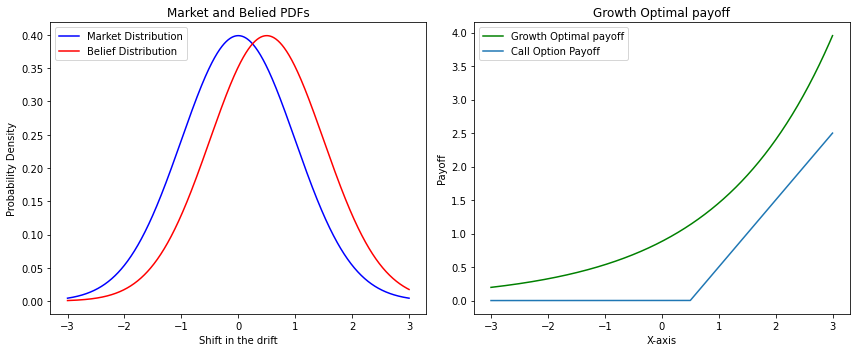

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy.stats import norm
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
from scipy.stats import gaussian_kde


mu = 0 
sigma = 1  

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
market_pdf = norm.pdf(x, mu, sigma)
belief_pdf = norm.pdf(x, mu+0.5, sigma)
growth_optimal_payoff = belief_pdf / market_pdf

def call_option_payoff(spot_price, strike_price):
    return np.maximum(spot_price - strike_price, 0)

def put_option_payoff(spot_price, strike_price):
    return np.maximum(strike_price - spot_price, 0)

strike_price = 0.5
call_option_payoff = call_option_payoff(x, strike_price)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color = 'blue')
axs[0].plot(x, belief_pdf, label='Belief Distribution', color = 'red')
axs[0].set_title('Market and Belied PDFs')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[1].plot(x, call_option_payoff, label='Call Option Payoff')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

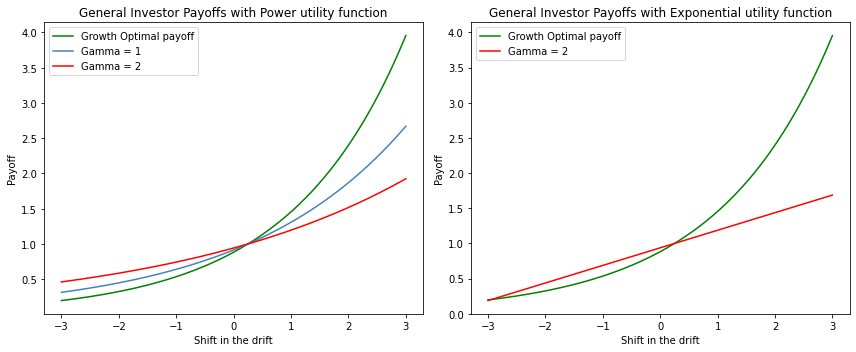

In [3]:

exp_general_payoffs = []
pow_general_payoffs = []

for gamma in range(1,20):
    pow_general_payoffs.append(pow_util(growth_optimal_payoff,1 + gamma*0.1))
    exp_general_payoffs.append(exp_util(growth_optimal_payoff,gamma)) 
    

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
#axs[0].plot(x, pow_general_payoffs[0], label='Gamma = 1.2', color = 'red')
axs[0].plot(x, pow_general_payoffs[3], label='Gamma = 1',color = 'steelblue')
axs[0].plot(x, pow_general_payoffs[10], label='Gamma = 2', color = 'red')
#axs[0].plot(x, call_option_payoff, label='Call Option Payoff', color = 'steelblue')
axs[0].set_title('General Investor Payoffs with Power utility function')
axs[0].set_xlabel('Shift in the drift')
axs[0].set_ylabel('Payoff')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
#axs[1].plot(x, exp_general_payoffs[0], label='Gamma = 1', color = 'steelblue')
axs[1].plot(x, exp_general_payoffs[1], label='Gamma = 2', color = 'red')
#axs[1].plot(x, exp_util(growth_optimal_payoff,5), label='Gamma = 5', color = 'purple')
#axs[1].plot(x, call_option_payoff, label='Call Option Payoff', color = 'steelblue')
axs[1].set_title('General Investor Payoffs with Exponential utility function')
axs[1].set_xlabel('Shift in the drift')
axs[1].set_ylabel('Payoff')
axs[1].legend()



plt.tight_layout()
plt.show()

For the case of the power utility when the risk aversion increases (parameter gamma increases) and so our investor does not like risk, we observe that his derived payoff is similar to the one of the growth optimizing payoff, as well as the call option payoff, and he is also willing to sacrifice his potential gain for some better downside protection.

In the case of the exponential utility function as the risk aversion increases the resulting payoff is similar to a forward contract which is less risky than the growth optimizer payoff which is similar to a call option. Again as gamma increases the investor is willing to sacrifice his potential gain for some better downside protection.

#### Shift in the volatility

Similarly, a belief that the market underestimates volatility corresponds to a believed distribution which is wider but not as tall as the market-implied distribution. Again, we can sketch the growth-optimal profile and see that it works pretty much the same way as the textbook vanilla combinations – straddles and strangles. These classical vanilla combinations can be considered as crude approximations of the growth-optimal payoff.

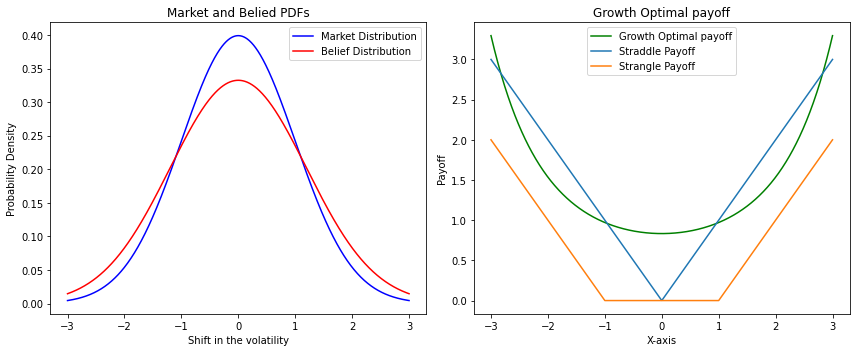

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0
sigma = 1

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
market_pdf = norm.pdf(x, mu, sigma)
belief_pdf = norm.pdf(x, mu, 1.2 * sigma)
growth_optimal_payoff = belief_pdf / market_pdf

def call_option_payoff(spot_price, strike_price):
    return np.maximum(spot_price - strike_price, 0)

def put_option_payoff(spot_price, strike_price):
    return np.maximum(strike_price - spot_price, 0)

def straddle_payoff(spot_price, strike_price):
    call_payoff = call_option_payoff(spot_price, strike_price)
    put_payoff = put_option_payoff(spot_price, strike_price)
    return call_payoff + put_payoff

def strangle_payoff(spot_price, call_strike, put_strike):
    call_payoff = call_option_payoff(spot_price, call_strike)
    put_payoff = put_option_payoff(spot_price, put_strike)
    return call_payoff + put_payoff

straddle_strike = 0
strangle_put_strike = -1
strangle_call_strike = 1

straddle_payoff_values = straddle_payoff(x, straddle_strike)
strangle_payoff_values = strangle_payoff(x, strangle_call_strike, strangle_put_strike)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color='blue')
axs[0].plot(x, belief_pdf, label='Belief Distribution', color='red')
axs[0].set_title('Market and Belied PDFs')
axs[0].set_xlabel('Shift in the volatility')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff , label='Growth Optimal payoff', color='green')
axs[1].plot(x, straddle_payoff_values, label='Straddle Payoff')
axs[1].plot(x, strangle_payoff_values, label='Strangle Payoff')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()


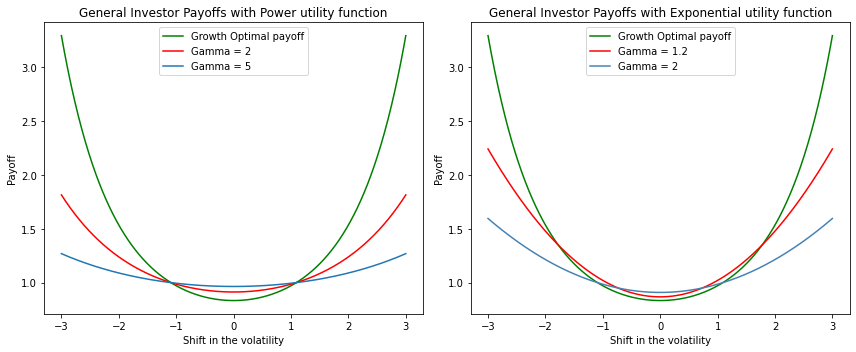

In [5]:

exp_general_payoffs = []
pow_general_payoffs = []

for gamma in range(1,20):
    pow_general_payoffs.append(pow_util(growth_optimal_payoff,gamma))
    exp_general_payoffs.append(exp_util(growth_optimal_payoff,gamma))  # 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[0].plot(x, pow_general_payoffs[1], label='Gamma = 2', color = 'red')
axs[0].plot(x, pow_general_payoffs[4], label='Gamma = 5')
#axs[0].plot(x, pow_general_payoffs[4], label='Gamma = 2', color = 'orange')
#axs[0].plot(x, straddle_payoff_values, label='Straddle Payoff',color = 'steelblue')
#axs[0].plot(x, strangle_payoff_values, label='Strangle Payoff',color = 'black')
axs[0].set_title('General Investor Payoffs with Power utility function')
axs[0].set_xlabel('Shift in the volatility')
axs[0].set_ylabel('Payoff')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff, label='Growth Optimal payoff', color='green')
axs[1].plot(x, exp_general_payoffs[0]+0.05, label='Gamma = 1.2', color = 'red')
axs[1].plot(x, exp_general_payoffs[1], label='Gamma = 2', color = 'steelblue')
#axs[1].plot(x, exp_util(growth_optimal_payoff,5), label='Gamma = 5', color = 'purple')
#axs[1].plot(x, straddle_payoff_values, label='Straddle Payoff',color = 'steelblue')
#axs[1].plot(x, strangle_payoff_values, label='Strangle Payoff',color = 'black')
axs[1].set_title('General Investor Payoffs with Exponential utility function')
axs[1].set_xlabel('Shift in the volatility')
axs[1].set_ylabel('Payoff')
axs[1].legend()

plt.tight_layout()
plt.show()

For the case of the power utility when the risk aversion increases (parameter gamma increases) and so our investor does not like risk, we observe that his derived payoff is similar to the one of the growth optimizing payoff. He is also willing to sacrifice his potential gain in the sense that as we proceed to the tais the payoff becomes smaller but near ATM (where he loses) the payoff becomes higher, aiming for some better downside protection.

In the case of the exponential utility function, it is the first time that we observe that the results through the procedure are not that similar with the Growth Optimal payoff.

#### Shift in the skew

Moving on to more complex examples, let us see how we could help investors with views on the skew. For a simple, analytically tractable illustration, recall the definition of a skew-normal distribution.

The probability density for a skew-normal random variable is defined as $ SN(x,\xi) = 2\phi (x)\Phi(\xi x) $, where $\phi (x)$ and $ \Phi(x) $ are the probability density for the standard normal variable and the corresponding cumulative distribution function, respectively.

To this end, imagine a market which implies a normal distribution, $ m(x) = SN(x,0) $ for some variable x. Now consider an investor which does not agree with the market. The investor believes that, in reality, there is a skew and uses a skew-normal distribution, $ b(x) = SN(x,\xi) $, to describe this belief. For the growth-optimal payoff we compute:

$$ f(x) = \dfrac{b(x)}{m(x)} = \dfrac{SN(x,\xi)}{SN(x,0)} = 2\Phi (\xi x) $$

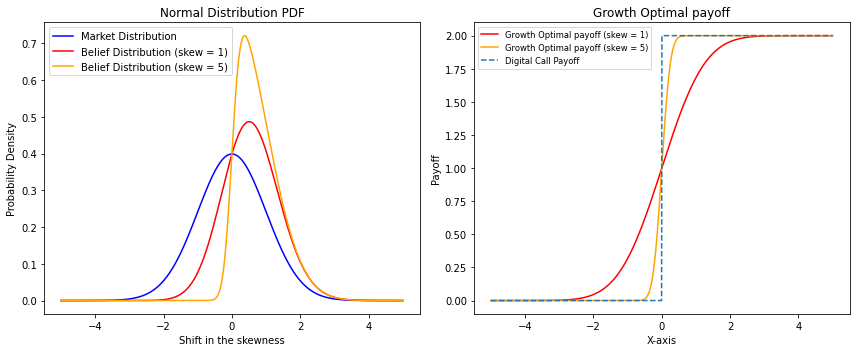

In [6]:
from scipy.stats import skewnorm

a1 = 1  # skewness parameter
a2 = 5
loc = 0 
scale = 1  


x = np.linspace(-5, 5, 1000)

market_pdf = skewnorm.pdf(x, 0, loc, scale)
belief_pdf1 = skewnorm.pdf(x, a1, loc, scale)
belief_pdf2 = skewnorm.pdf(x, a2, loc, scale)
growth_optimal_payoff1 = belief_pdf1 / market_pdf
growth_optimal_payoff2 = belief_pdf2 / market_pdf

def digital_call_payoff(spot_price, strike_price, payoff_amount=2):
    return np.where(spot_price > strike_price, payoff_amount, 0)

strike_price = 0
digital_call_payoff_values = digital_call_payoff(x, strike_price)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, market_pdf, label='Market Distribution', color='blue')
axs[0].plot(x, belief_pdf1, label='Belief Distribution (skew = 1)', color='red')
axs[0].plot(x, belief_pdf2, label='Belief Distribution (skew = 5)', color='orange')

axs[0].set_title('Normal Distribution PDF')
axs[0].set_xlabel('Shift in the skewness')
axs[0].set_ylabel('Probability Density')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff1, label='Growth Optimal payoff (skew = 1)', color='red')
axs[1].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff (skew = 5)', color='orange')
axs[1].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--')
axs[1].set_title('Growth Optimal payoff')
axs[1].set_xlabel('X-axis')
axs[1].set_ylabel('Payoff')
axs[1].legend(loc='upper left',fontsize='small')

plt.tight_layout()
plt.show()

We immediately recognize the profile of a cumulative distribution function which contains a classic skew product – the digital – as a limiting case.

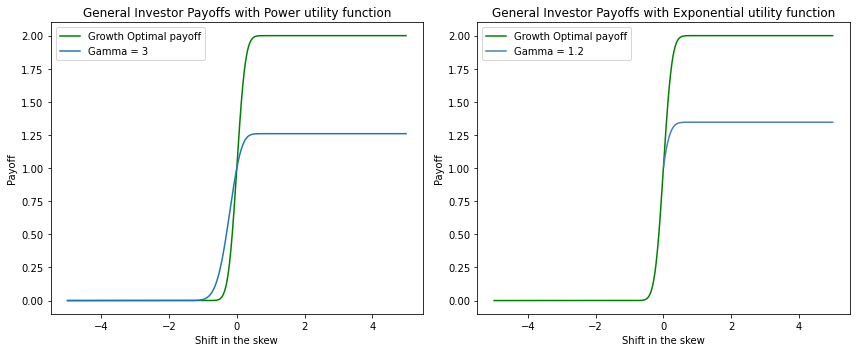

In [7]:
exp_general_payoffs = []
pow_general_payoffs = []

for gamma in range(1,6):
    pow_general_payoffs.append(pow_util(growth_optimal_payoff2,gamma))
    exp_general_payoffs.append(exp_util(growth_optimal_payoff2,gamma)) # 
     
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff', color='green')
#axs[0].plot(x, pow_general_payoffs[1], label='Gamma = 1.2', color = 'red')
axs[0].plot(x, pow_general_payoffs[2], label='Gamma = 3')
#axs[0].plot(x, pow_general_payoffs[4], label='Gamma = 2', color = 'orange')
#axs[0].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--',color = 'steelblue')
axs[0].set_title('General Investor Payoffs with Power utility function')
axs[0].set_xlabel('Shift in the skew')
axs[0].set_ylabel('Payoff')
axs[0].legend()

axs[1].plot(x, growth_optimal_payoff2, label='Growth Optimal payoff', color='green')
axs[1].plot(x[500:], exp_general_payoffs[1][500:], label='Gamma = 1.2', color = 'steelblue')
#axs[1].plot(x, exp_general_payoffs[4], label='Gamma = 2', color = 'orange')
#axs[1].plot(x, digital_call_payoff_values, label='Digital Call Payoff', linestyle='--',color = 'steelblue')
axs[1].set_title('General Investor Payoffs with Exponential utility function')
axs[1].set_xlabel('Shift in the skew')
axs[1].set_ylabel('Payoff')
axs[1].legend()



plt.tight_layout()
plt.show()